# Feature Selection Visually Explained on Titanic 🎯

Welcome back! This video continues my Titanic machine learning series. If you're new here, check out the earlier tutorials:
- [Decision Tree Overfitting Visualized](https://www.youtube.com/watch?v=offRb9fBOuw&t=29s)
- [Grid Search with Random Forest (Top 6% Kaggle Score)](https://www.youtube.com/watch?v=yVul279EMlA&t=45s)
- [Why your model looks perfet.. then fails: Random Forest vs Decision Tree](https://www.youtube.com/watch?v=m4YGczrVueI&t=4s) 
- [Overfitting Explained Visually | Decision Tree on Titanic Data](https://www.youtube.com/watch?v=Pt14X7j-sbY&t=4s)

---
### 🔍 What is Cross-Validation?
Imagine if you split your data just once — what if your model got lucky?
Cross-validation gives a **more reliable estimate** of model performance by:
- Creating 'Buckets' (we called it at investment firm)
- Repeating the train/test split multiple times
- Reducing the chance of **overfitting**
- Showing how your model performs across **multiple "buckets" of data**

Here is the Titanic dataset again and to how 5-fold cross-validation works with real Python code and visuals.

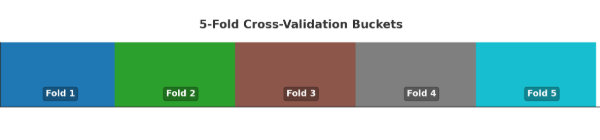

Instead of splitting the data just once, we divide it into 5 equal buckets. The model trains and tests 5 times and then averages the result.

# Train Data
Train.csv will contain the details of a subset of the passengers on board (891 to be exact) and whether they survive or not. The shape of the train data is (891, 12). 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import numpy as np

df = pd.read_csv('/kaggle/input/titanic/train.csv')
test_df = pd.read_csv('/kaggle/input/titanic/test.csv')

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Feature Engineer
Must match columns for both the train and test dataset. Encode Categorical Variables is needed for this dataset since there are many important variables that are not numeric yet. There are three classes C, Q, and S. Class C seems to have the highest chance of survival. Class S has the lowest chance of survival. Unfornately this would tend to show that economic status seems to played a part in the decision if someone survived or not. Embarked does not play role major role in feature importance. 

In [2]:
# Preprocessing:
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
test_df['Sex'] = test_df['Sex'].map({'male': 0, 'female': 1})
passID=test_df['PassengerId']

# Fill missing Age and Fare values using the train set's median
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Fare'] = df['Fare'].fillna(df['Fare'].median())

test_df['Age'] = test_df['Age'].fillna(df['Age'].median())
test_df['Fare'] = test_df['Fare'].fillna(df['Fare'].median())

# Fill missing first
df['Embarked'] = df['Embarked'].fillna('S')  # 'S' is most common
df['Embarked'] = df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

# Map to numbers
test_df['Embarked'] = test_df['Embarked'].fillna('S')
test_df['Embarked'] = test_df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

# Now select features (after filling)
df = df[['Survived', 'Pclass', 'Sex', 'Age', 'Fare','Embarked']]
test_df = test_df[['Pclass', 'Sex', 'Age', 'Fare', 'Embarked']]

# Split features and target
X = df.drop('Survived', axis=1)
y = df['Survived']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Step 2: Train models

In [3]:
from sklearn.model_selection import cross_val_score
model = RandomForestClassifier(n_estimators=100, random_state=42)
cv_scores = cross_val_score(model, X, y, cv=10, scoring='accuracy')

print("Cross-validation scores:", cv_scores)
print("Average CV accuracy:", round(cv_scores.mean(), 4))

Cross-validation scores: [0.78888889 0.83146067 0.7752809  0.84269663 0.86516854 0.82022472
 0.85393258 0.7752809  0.84269663 0.85393258]
Average CV accuracy: 0.825


In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Define model
model = RandomForestClassifier()

# Fit model (this is required)
model.fit(X_train, y_train)

# Now you can use the model
y_pred = model.predict(X_test)

# Accuracy
print("Random Forest Train Accuracy:", round(model.score(X_train, y_train), 3))
print("Random Forest Test Accuracy:", round(accuracy_score(y_test, y_pred), 3))

Random Forest Train Accuracy: 0.979
Random Forest Test Accuracy: 0.785


In [5]:
df.dtypes

Survived      int64
Pclass        int64
Sex           int64
Age         float64
Fare        float64
Embarked      int64
dtype: object

## Check Duplicates and Missing Values

In [6]:
#Check Duplicates:
dupstr = df.duplicated()
print('Total no of duplicate values in Training Dataset = %d' % (dupstr.sum()))
df[dupstr].head(10)

Total no of duplicate values in Training Dataset = 125


,Survived,Pclass,Sex,Age,Fare,Embarked
47,1,3,1,28.0,7.7500,2
55,1,1,0,28.0,35.5000,0
76,0,3,0,28.0,7.8958,0
77,0,3,0,28.0,8.0500,0
87,0,3,0,28.0,8.0500,0
95,0,3,0,28.0,8.0500,0
101,0,3,0,28.0,7.8958,0
105,0,3,0,28.0,7.8958,0
120,0,2,0,21.0,73.5000,0
121,0,3,0,28.0,8.0500,0


In [7]:
#search for columns with missing values:
def findNA():
    print("Missing data by column as a percent:")
    findNA=df.isnull().sum().sort_values(ascending=False)/len(df)
    print(findNA.head())
findNA() 

Missing data by column as a percent:
Survived    0.0
Pclass      0.0
Sex         0.0
Age         0.0
Fare        0.0
dtype: float64


## Confusion Matrix
Males (Sex = 0) had a much lower survival rate than females (Sex = 1).
As we’ll see later in feature importance, gender is one of the most predictive features.

In [8]:
genderTable = pd.crosstab(df['Survived'],df['Sex'])
genderTable.columns = ['Male', 'Female']
genderTable.index = ['Did Not Survive', 'Survived']
gender_percent = genderTable.div(genderTable.sum(axis=1), axis=0).round(2)
gender_percent

,Male,Female
Did Not Survive,0.85,0.15
Survived,0.32,0.68


# Examine Target Variable
Survived is the Y variable we will be analyzing. Since the survival rete is 0.384 the data is not considered unbalanced. 

In [9]:
temp=df['Survived'].value_counts()
print(temp)
no=temp[0]
yes=temp[1]
percent=round(yes/(yes+no),3)
print("Percent that survived: ", percent)

0    549
1    342
Name: Survived, dtype: int64
Percent that survived:  0.384


# Numeric DataFrame
For now, we will analyze only numeric values. Categorical values will need to be encoded or analyzed individually.

In [10]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
df = df.select_dtypes(include=numerics)
df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked
0,0,3,0,22.0,7.2500,0
1,1,1,1,38.0,71.2833,1
2,1,3,1,26.0,7.9250,0
3,1,1,1,35.0,53.1000,0
4,0,3,0,35.0,8.0500,0


# Check for missing values
Age is missing around 20% of values.Therefore, we can simply fill in the mean for that one column.

In [11]:
#search for columns with missing values:
def findNA():
    print("Missing data by column as a percent:")
    findNA=df.isnull().sum().sort_values(ascending=False)/len(df)
    print(findNA.head())
findNA() 

Missing data by column as a percent:
Survived    0.0
Pclass      0.0
Sex         0.0
Age         0.0
Fare        0.0
dtype: float64


In [12]:
df= df.fillna(df.mean())

# Split Data

In [13]:
X=df.drop('Survived', axis=1)
y=df['Survived']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.30, random_state = 42)

# Highly Correlated Features
There are no highly correlated variables above 80%. Therefore, we do not need to be concerned about removing variables that are too highly correlated. 

# Tunning Forest
Random forest AUC:  0.8503 which is good results considering forest does not overfit data.

In [14]:
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier

#Check for Error and find Best n_estimators:
def forestNumEst():
    numbers= [2, 20, 40, 50, 60, 100]
    maeList=[] #error
    accList=[]
    
    for n in numbers:
        forest = RandomForestClassifier(n_estimators=n, oob_score = True)
        forest.fit(X_train, y_train)
        y_pred = forest.predict(X_test)
        mae=metrics.mean_absolute_error(y_test, y_pred).round(2)
        forest_auc = round( metrics.roc_auc_score(y_test, y_pred), 4 ) 
        #print("Random forest AUC: ", forest_auc) 
      
        accList.append(forest_auc)
        maeList.append(mae)
        
    plt.plot(numbers,accList)
    plt.title("Forest Estimators" )
    plt.xlabel("Estimators")
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show() 
    
    plt.plot(numbers, maeList)
    plt.title("Forest Estimators" )
    plt.xlabel("Estimators")
    plt.ylabel('error')
    plt.legend()
    plt.show() 

#forestNumEst() 

# GridSearch CV
GridSearchCV helps find the best combination of model parameters by testing all possible combinations from a grid you define. It trains the model multiple times using cross-validation and returns the settings that give the highest accuracy (or lowest error). This helps automate model tuning and improves performance by avoiding guesswork.

In [15]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold, cross_val_score

def runGridSearch():
    params = {
        'n_estimators':[50, 60, 70],
        'max_depth':[6, 9, 12],
        'min_samples_split':[2, 3],  #2 is default
        'min_samples_leaf':[1, 3, 5]   #1 is default
        #'max_features':['auto', 'sqrt', 'log2'],
        #'criterion':['gini', 'entropy'],
    }
    
    #kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=7)
    forestGrid=GridSearchCV(estimator=RandomForestClassifier(), param_grid=params, cv=5, scoring='accuracy')
    forestGrid.fit(X_train, y_train)
    forestGrid.best_params_
runGridSearch()

#### Final Random Forest Prediction
* Top 5% Using {'max_depth': 5, 'n_estimators': 60} 0.79425

# Test Data

In [16]:
col_features=list(X.columns)
test_df=test_df[col_features]
test_df.head()

,Pclass,Sex,Age,Fare,Embarked
0,3,0,34.5,7.8292,2
1,3,1,47.0,7.0000,0
2,2,0,62.0,9.6875,2
3,3,0,27.0,8.6625,0
4,3,1,22.0,12.2875,0


# Final Prediction

In [17]:
test_predictions = model.predict(test_df)
tupleData = list(zip(passID, test_predictions))
output = pd.DataFrame(tupleData, columns = ['PassengerId', 'Survived'])
output.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,1


In [18]:
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


In [19]:
import os
print("Files in current directory:", os.listdir())

Files in current directory: ['__notebook__.ipynb', 'submission.csv']
